# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import re
import warnings
warnings.filterwarnings('ignore')

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результатов (чтобы все случайные инициализации происходили аналогично предыдущему запуску)

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

###Дубликаты и пропуски (п.1, 2)

In [3]:
#дубликаты

print(f'В train {len(df_train)-len(df_train.drop_duplicates())} дубликатов')
df_train.drop_duplicates(inplace=True)
print(df_train.shape)

print()

print(f'В test {len(df_test)-len(df_test.drop_duplicates())} дубликатов')
df_test.drop_duplicates(inplace=True)
print(df_test.shape)

В train 985 дубликатов
(6014, 13)

В test 62 дубликатов
(938, 13)


In [4]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6992            Hyundai Santro Xing GLS  2008         120000     191000   
6993  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6994                  Hyundai i20 Magna  2013         320000     110000   
6995              Hyundai Verna CRDi SX  2007         135000     119000   
6996             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
6992  Petrol  Individual       Manual           First Owner  17.92 kmpl   
6993  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
6994  Petrol  Individual       Manual           First Owner   18.5 kmpl   
6995  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
6996  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
6992  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
6993   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
6994  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[6014 rows x 13 columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6014 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6014 non-null   object 
 1   year           6014 non-null   int64  
 2   selling_price  6014 non-null   int64  
 3   km_driven      6014 non-null   int64  
 4   fuel           6014 non-null   object 
 5   seller_type    6014 non-null   object 
 6   transmission   6014 non-null   object 
 7   owner          6014 non-null   object 
 8   mileage        5824 non-null   object 
 9   engine         5824 non-null   object 
 10  max_power      5827 non-null   object 
 11  torque         5823 non-null   object 
 12  seats          5824 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 657.8+ KB


In [6]:
 #приведем столбцы к числовому типу

def data_preproc(df):

  '''
  Функция преобразующая столбцы со строковой информацией в числовые
  '''

  df['mileage'] = df['mileage'].transform(lambda x: float(str(x).split()[0]))

  df['engine'] = df['engine'].transform(lambda x: float(str(x).split()[0]))

  #в столбце 'max_power' была одна строка, где наименование стояло перед цифрой
  df['max_power'] = df['max_power'].transform(lambda x: float(str(x).split()[0]) if str(x).split()[0].isalpha() == False else 0)

  df['torque_Nm'] = df['torque'].transform(lambda x: str(x).split()[0]).astype('str')
  df['torque_Nm'] = df['torque_Nm'].apply(lambda x: re.findall(r'\d+\.?\d+?', x)).apply(lambda x: float(''.join(x)) if ''.join(x) != '' else 0)


  df['torque_rpm'] = df['torque'].transform(lambda x: str(x).replace(str(x).split()[0], '')).astype('str')
  df['torque_rpm'] = df['torque_rpm'].apply(lambda x: re.findall(r'\d+\.?\d+?', x))
  #т.к. по некоторым автомобилям есть 2 значения, то сделаем 2 столбца с минимальным и максимальным значением

  def choose_min(lst):
      if len(lst) > 1:
        if lst[0] < lst[1]:
          return lst[0]
        else:
          return lst[1]
      elif len(lst) == 1:
        return lst[0]
      else:
        return 0

  df['torque_rpm_min'] = df['torque_rpm'].apply(choose_min).astype('float')

  def choose_max(lst):
      if len(lst) > 1:
        if lst[0] > lst[1]:
          return lst[0]
        else:
          return lst[1]
      elif len(lst) == 1:
        return lst[0]
      else:
        return 0

  df['torque_rpm_max'] = df['torque_rpm'].apply(choose_max).astype('float')

  df.drop(columns=['torque', 'torque_rpm'], inplace = True)

  return df

In [7]:
df_train = data_preproc(df_train)
df_test = data_preproc(df_test)

In [8]:
df_train.isnull().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           190
engine            190
max_power           0
seats             190
torque_Nm           0
torque_rpm_min      0
torque_rpm_max      0
dtype: int64

In [9]:
df_test.isnull().sum() [df_test.isnull().sum() >0]

mileage    19
engine     19
seats      19
dtype: int64

In [10]:
cols_with_nans = []
for col in df_train.columns:
  if df_train[col].isnull().sum() > 0:
    cols_with_nans.append(col)
print(f'Пропуски в столбцах {cols_with_nans}')

Пропуски в столбцах ['mileage', 'engine', 'seats']


In [11]:
#посмотрим на пропуски
df_train[df_train['engine'].isnull()]

name  year  selling_price  km_driven  \
12                    Maruti Swift 1.3 VXi  2007         200000      80000   
28                      Fiat Palio 1.2 ELX  2003          70000      50000   
69                         Tata Indica DLS  2003          50000      70000   
78             Maruti Swift VDI BSIV W ABS  2015         475000      78000   
107                  Maruti Swift VDI BSIV  2010         300000     120000   
...                                    ...   ...            ...        ...   
6675                Hyundai Santro Xing XG  2004          70000      70000   
6889             Hyundai Santro LS zipPlus  2000         140000      50000   
6901  Hyundai Santro Xing XS eRLX Euro III  2006         145000      80000   
6949             Ford Figo Aspire Facelift  2017         580000     165000   
6976                  Maruti Swift 1.3 VXi  2006         130000     100000   

        fuel seller_type transmission         owner  mileage  engine  \
12    Petrol  Individual       Manual  Second Owner      NaN     NaN   
28    Petrol  Individual       Manual  Second Owner      NaN     NaN   
69    Diesel  Individual       Manual   First Owner      NaN     NaN   
78    Diesel      Dealer       Manual   First Owner      NaN     NaN   
107   Diesel  Individual       Manual  Second Owner      NaN     NaN   
...      ...         ...          ...           ...      ...     ...   
6675  Petrol  Individual       Manual  Second Owner      NaN     NaN   
6889  Petrol  Individual       Manual  Second Owner      NaN     NaN   
6901  Petrol  Individual       Manual  Second Owner      NaN     NaN   
6949  Diesel  Individual       Manual   First Owner      NaN     NaN   
6976  Petrol  Individual       Manual  Second Owner      NaN     NaN   

      max_power  seats  torque_Nm  torque_rpm_min  torque_rpm_max  
12          0.0    NaN        0.0             0.0             0.0  
28          0.0    NaN        0.0             0.0             0.0  
69          0.0    NaN        0.0             0.0             0.0  
78          0.0    NaN        0.0             0.0             0.0  
107         0.0    NaN        0.0             0.0             0.0  
...         ...    ...        ...             ...             ...  
6675        0.0    NaN        0.0             0.0             0.0  
6889        0.0    NaN        0.0             0.0             0.0  
6901        0.0    NaN        0.0             0.0             0.0  
6949        0.0    NaN        0.0             0.0             0.0  
6976        0.0    NaN        0.0             0.0             0.0  

[190 rows x 15 columns]

In [12]:
#проверим, есть ли требуемые данные в других объектах с такой же маркой авто
df_train[df_train['name']=='Maruti Swift 1.3 VXi']


#ВЫВОД: отсутствует инфо по марке машины в целом

name  year  selling_price  km_driven    fuel  \
12    Maruti Swift 1.3 VXi  2007         200000      80000  Petrol   
197   Maruti Swift 1.3 VXi  2008         130000     120000  Petrol   
267   Maruti Swift 1.3 VXi  2010         215000      70000  Petrol   
647   Maruti Swift 1.3 VXi  2006         140000      65000  Petrol   
1141  Maruti Swift 1.3 VXi  2008         240000      60000  Petrol   
1528  Maruti Swift 1.3 VXi  2007         150000      70000  Petrol   
4043  Maruti Swift 1.3 VXi  2009         220000      25000  Petrol   
4910  Maruti Swift 1.3 VXi  2007         150000      80000  Petrol   
4979  Maruti Swift 1.3 VXi  2009         180000      50000  Petrol   
5502  Maruti Swift 1.3 VXi  2008         200000      80000  Petrol   
6176  Maruti Swift 1.3 VXi  2010         175000      83000  Petrol   
6405  Maruti Swift 1.3 VXi  2009         198000      91000  Petrol   
6530  Maruti Swift 1.3 VXi  2006         215000      90000  Petrol   
6976  Maruti Swift 1.3 VXi  2006         130000     100000  Petrol   

     seller_type transmission                 owner  mileage  engine  \
12    Individual       Manual          Second Owner      NaN     NaN   
197   Individual       Manual          Second Owner      NaN     NaN   
267   Individual       Manual          Second Owner      NaN     NaN   
647   Individual       Manual           Third Owner      NaN     NaN   
1141  Individual       Manual           First Owner      NaN     NaN   
1528  Individual       Manual           Third Owner      NaN     NaN   
4043  Individual       Manual           First Owner      NaN     NaN   
4910  Individual       Manual  Fourth & Above Owner      NaN     NaN   
4979  Individual       Manual           First Owner      NaN     NaN   
5502  Individual       Manual          Second Owner      NaN     NaN   
6176  Individual       Manual          Second Owner      NaN     NaN   
6405  Individual       Manual          Second Owner      NaN     NaN   
6530  Individual       Manual  Fourth & Above Owner      NaN     NaN   
6976  Individual       Manual          Second Owner      NaN     NaN   

      max_power  seats  torque_Nm  torque_rpm_min  torque_rpm_max  
12          0.0    NaN        0.0             0.0             0.0  
197         0.0    NaN        0.0             0.0             0.0  
267         0.0    NaN        0.0             0.0             0.0  
647         0.0    NaN        0.0             0.0             0.0  
1141        0.0    NaN        0.0             0.0             0.0  
1528        0.0    NaN        0.0             0.0             0.0  
4043        0.0    NaN        0.0             0.0             0.0  
4910        0.0    NaN        0.0             0.0             0.0  
4979        0.0    NaN        0.0             0.0             0.0  
5502        0.0    NaN        0.0             0.0             0.0  
6176        0.0    NaN        0.0             0.0             0.0  
6405        0.0    NaN        0.0             0.0             0.0  
6530        0.0    NaN        0.0             0.0             0.0  
6976        0.0    NaN        0.0             0.0             0.0

In [13]:
#скопируем трейн данные для формирования источника для заполнения пропусков

general_df=df_train
general_df.shape

(6014, 15)

In [14]:
#получим инфо об объеме двигателя из названия авто, где это возможно, остальное заполним средним по столбцу

def engine_from_name(df):

  '''
  функция, вытягивающая из названия авто инфо об объеме двигателя
  '''

  for i in range(len(df)):
      if np.isnan(df['engine'].iloc[i]):
        x = ''.join(re.findall(r'\d\.\d', df['name'].iloc[i]))
        if x != '':
          df['engine'].iloc[i] = float(x)*1000
        else:
          df['engine'].iloc[i] = df['engine'].median()
  return df


#заполним пропуски по объему двигателя во всех датасетах
general_df = engine_from_name(general_df)
df_train = engine_from_name(df_train)
df_test = engine_from_name(df_test)

In [15]:
#сгруппируем данные по объемам двигателя в бины, чтобы посчитать средний расход для двигателей примерно одного объема.
#понадобилось 14 бинов, чтобы расчитались средние значения для любого типа двигателя


N_BINS = 14
FILLING_SETTINGS = 'median'
for_fill = general_df.groupby('engine').agg({'mileage' : FILLING_SETTINGS,
                                             'max_power' : FILLING_SETTINGS,
                                             'seats' : FILLING_SETTINGS,
                                             'torque_Nm' : FILLING_SETTINGS,
                                             'torque_rpm_min' : FILLING_SETTINGS,
                                             'torque_rpm_max' : FILLING_SETTINGS})
for_fill = for_fill.reset_index()
for_fill['bins']=pd.cut(for_fill['engine'], bins = N_BINS)
for_fill['labels'] = pd.cut(for_fill['engine'], bins = N_BINS, labels = range(N_BINS))
for_fill = for_fill.groupby('labels').agg({'mileage' : 'mean',
                                'max_power' : 'mean',
                                'seats' : pd.Series.mode,
                                'torque_Nm' : 'mean',
                                'torque_rpm_min' : 'mean',
                                'torque_rpm_max' : 'mean',
                                'bins' : pd.Series.mode})

for_fill

mileage   max_power       seats   torque_Nm  torque_rpm_min  \
labels                                                                  
0       23.798000   47.856000         5.0   76.900000     3477.200000   
1       22.148571   61.092857         5.0  105.328571     3085.714286   
2       19.326154   70.882857         5.0  116.242857     2867.857143   
3       17.604706   76.483158         5.0  110.015789     2081.578947   
4       16.806176   87.292632         5.0  160.163158     2107.894737   
5       14.160000  122.427778         5.0   88.511111     1527.777778   
6       13.945769  151.050000         5.0  309.130769     1594.230769   
7       14.078750  161.438750         7.0  353.412500     1587.500000   
8       13.786071  140.040714         5.0  236.678571     2716.071429   
9       13.726000  125.868000  [7.0, 8.0]  279.400000     2200.000000   
10      12.377500  151.597500         7.0  372.500000     1675.000000   
11      12.173333  218.646667  [5.0, 7.0]  435.000000     2241.666667   
12      10.910000  197.000000         7.0  470.000000     1750.000000   
13      10.215000  276.000000         5.0  351.000000     4400.000000   

        torque_rpm_max                  bins  
labels                                        
0          2777.200000     (621.02, 836.857]  
1          3457.142857   (836.857, 1049.714]  
2          3189.285714  (1049.714, 1262.571]  
3          2413.157895  (1262.571, 1475.429]  
4          2377.631579  (1475.429, 1688.286]  
5          1838.888889  (1688.286, 1901.143]  
6          2021.153846    (1901.143, 2114.0]  
7          2387.500000    (2114.0, 2326.857]  
8          3280.357143  (2326.857, 2539.714]  
9          2760.000000  (2539.714, 2752.571]  
10         2475.000000  (2752.571, 2965.429]  
11         3091.666667  (2965.429, 3178.286]  
12         2500.000000  (3178.286, 3391.143]  
13         4400.000000    (3391.143, 3604.0]

In [16]:
#заполним пропуски средними значениями в зависимости от того, в какую группу попал автомобиль с определенным объемом двигателя

def fill_nans(df, col_for_fill):

  for i in range(len(df)):
    if np.isnan(df[col_for_fill].iloc[i]):
      for j in range(len(for_fill)):
        if df['engine'].iloc[i] in for_fill['bins'][j]:
          df[col_for_fill].iloc[i] = for_fill[col_for_fill][j]
  return df


#'mileage' (расход топлива) зависит от объема двигателя машины (столбец 'engine'), поэтому заполним пропуски средним значением по 'engine'
for col in ['mileage', 'max_power', 'seats', 'torque_Nm', 'torque_rpm_min', 'torque_rpm_max']:
  df_train = fill_nans(df_train, col)
  df_test = fill_nans(df_test, col)

In [17]:
#проверяем, что пропуски заполнились
df_train.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque_Nm         0
torque_rpm_min    0
torque_rpm_max    0
dtype: int64

In [18]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque_Nm         0
torque_rpm_min    0
torque_rpm_max    0
dtype: int64

In [19]:
#всё заполнили, ничего не потеряли
print(df_train.shape, df_test.shape)

(6014, 15) (938, 15)


###Дашборд (п.3,4)

In [20]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e853e270121dca67f8528078cb1e1d3e88d791a4677f06114a7226f1bfa9a2b5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [21]:
from ydata_profiling import ProfileReport

profile_report = ProfileReport(general_df.copy(), title='Pandas Profiling Report')

profile_report.to_file('SalesAuto_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**ВЫВОДЫ:**

- датасет имеет 15 столбцов и 6014 строк, без попусков и дубликатов.

- столбец 'name' имеет текстовый формат. ТОР-5 слов: 'maruti', 'hyundai', 'mahindra', 'swift', 'tata'.

- столбец 'year' числовой, с низкой дисперсией, значения от 1983 до 2020, распределение с левой асимметрией

- столбец 'selling_price' (target) числовой, логнормальное распределение,  значения от 29 999 до 10 000 000, среднее 521 982.03, стандартное отклонение 533 842.62, медиана 409 999, IQR 390 000

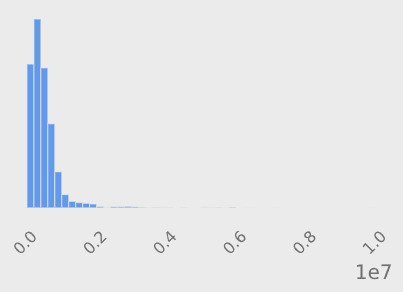

- столбец 'fuel' категориальный, 4 значения, сильный дисбаланс классов: на 2 категории 'Diesel' и 'Petrol' приходится 98,6% всех значений

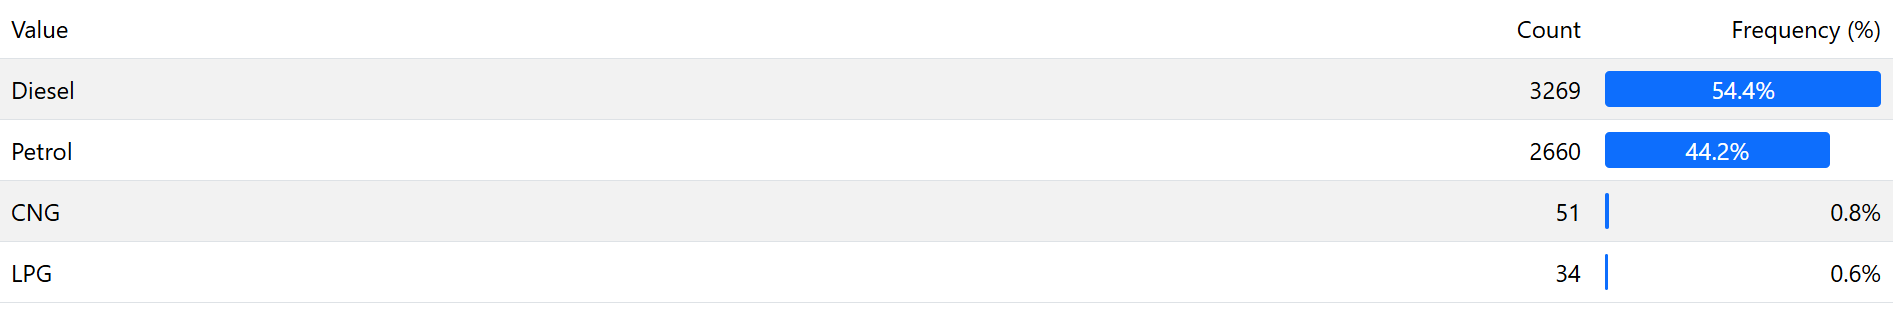


- в целом по категориальным столбцам наблюдаются сильные дисбалансы, числовые признаки преимущественно имеют нормальное распределение

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [20]:
pd.options.display.float_format = '{:,.2f}'.format

#основные статистики по числовым столбцам для трейна
df_train.describe()

year  selling_price    km_driven  mileage   engine  max_power  \
count 6,014.00       6,014.00     6,014.00 6,014.00 6,014.00   6,014.00   
mean  2,013.45     521,982.03    73,764.15    19.46 1,426.31      85.12   
std       4.08     533,842.62    59,610.75     3.99   484.68      35.05   
min   1,983.00      29,999.00         1.00     0.00   624.00       0.00   
25%   2,011.00     250,000.00    39,000.00    17.00 1,197.00      67.05   
50%   2,014.00     409,999.00    70,000.00    19.33 1,248.00      81.80   
75%   2,017.00     640,000.00   100,000.00    22.32 1,498.00      99.00   
max   2,020.00  10,000,000.00 2,360,457.00    42.00 3,604.00     400.00   

         seats  torque_Nm  torque_rpm_min  torque_rpm_max  
count 6,014.00   6,014.00        6,014.00        6,014.00  
mean      5.42     162.55        2,474.64        2,815.69  
std       0.98     497.66        1,253.68        1,151.11  
min       2.00       0.00            0.00            0.00  
25%       5.00      90.00        1,750.00        2,000.00  
50%       5.00     145.00        2,000.00        2,800.00  
75%       5.00     200.00        3,500.00        3,750.00  
max      14.00  38,038.70        5,000.00        5,300.00

In [21]:
#основные статистики по числовым столбцам для теста
df_test.describe()

year  selling_price  km_driven  mileage   engine  max_power  seats  \
count   938.00         938.00     938.00   938.00   938.00     938.00 938.00   
mean  2,013.52     549,664.22  72,733.97    19.39 1,434.25      86.85   5.41   
std       4.04     596,733.30  48,749.36     3.99   514.59      34.94   0.92   
min   1,995.00      31,000.00   1,303.00     0.00   624.00       0.00   4.00   
25%   2,011.00     250,000.00  38,862.75    16.50 1,197.00      67.10   5.00   
50%   2,014.00     420,000.00  65,000.00    19.37 1,248.00      81.86   5.00   
75%   2,017.00     650,000.00 100,000.00    22.32 1,498.00     100.00   5.00   
max   2,020.00   6,000,000.00 375,000.00    32.26 3,604.00     280.00   9.00   

       torque_Nm  torque_rpm_min  torque_rpm_max  
count     938.00          938.00          938.00  
mean      169.75        2,525.71        2,885.96  
std       366.52        1,228.25        1,095.14  
min         0.00            0.00            0.00  
25%        90.00        1,750.00        2,050.00  
50%       145.00        2,000.00        2,800.00  
75%       200.00        3,500.00        3,787.50  
max    11,011.20        5,000.00        5,200.00

In [22]:
#основные статистики по категориальным столбцам для трейна
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner
count                     6014    6014        6014         6014         6014
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                       107    3269        5394         5505         3721

In [23]:
#основные статистики по категориальным столбцам для теста
df_test.describe(include=['object'])

name    fuel seller_type transmission        owner
count                   938     938         938          938          938
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     502         820          845          566

In [24]:
#Сравните среднее и медиану внутри train
pd.DataFrame({'index' : df_train.describe().mean().index, 'mean' : df_train.describe().mean().values}).merge(pd.DataFrame({'index' : df_train.describe().median().index, 'median' : df_train.describe().median().values}), on='index')

index         mean     median
0            year     2,259.57   2,013.72
1   selling_price 1,548,979.58 465,990.51
2       km_driven   338,605.86  64,805.37
3         mileage       767.26      19.39
4          engine     2,012.00   1,337.16
5       max_power       847.75      83.46
6           seats       756.43       5.00
7       torque_Nm     5,643.49     181.28
8  torque_rpm_min     2,749.04   2,237.32
9  torque_rpm_max     2,978.85   2,807.84

In [25]:
#Сравните среднее и медиану внутри test
pd.DataFrame({'index' : df_test.describe().mean().index, 'mean' : df_test.describe().mean().values}).merge(pd.DataFrame({'index' : df_test.describe().median().index, 'median' : df_test.describe().median().values}), on='index')

index         mean     median
0            year     1,626.57   2,012.26
1   selling_price 1,062,291.94 484,832.11
2       km_driven    87,823.38  56,874.68
3         mileage       131.48      19.38
4          engine     1,382.23   1,222.50
5       max_power       198.59      84.36
6           seats       121.54       5.00
7       torque_Nm     1,615.06     184.88
8  torque_rpm_min     2,117.74   1,875.00
9  torque_rpm_max     2,344.57   2,425.00

**ВЫВОДЫ:**

- в столбцe 'year' среднее значение близко к медиане, что говорит о нормальном распределении

- в отсальных столбцах среднее сильно больше медианы, что говорит о смещении распределения влево, т.е. в стороне "больших" значений хвост тяжелее

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [26]:
print (f" В train {len(df_train.drop(columns=['selling_price'])) - len(df_train.drop(columns=['selling_price']).drop_duplicates())} объект с одинаковым признаковым описанием")

 В train 174 объект с одинаковым признаковым описанием


In [27]:
print(df_train.shape)
print(df_train.drop(columns=['selling_price']).drop_duplicates().shape)

#разница в столбцах из-за того, что torque разделен на 2: минимальное и максимальное знаяения

(6014, 15)
(5840, 14)


In [28]:
df_train = df_train.loc[df_train.drop(columns=['selling_price']).drop_duplicates().index.to_list()]
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6992            Hyundai Santro Xing GLS  2008         120000     191000   
6993  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6994                  Hyundai i20 Magna  2013         320000     110000   
6995              Hyundai Verna CRDi SX  2007         135000     119000   
6996             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage   engine  \
0     Diesel  Individual       Manual           First Owner    23.40 1,248.00   
1     Diesel  Individual       Manual          Second Owner    21.14 1,498.00   
2     Diesel  Individual       Manual           First Owner    23.00 1,396.00   
3     Petrol  Individual       Manual           First Owner    16.10 1,298.00   
4     Petrol  Individual       Manual           First Owner    20.14 1,197.00   
...      ...         ...          ...                   ...      ...      ...   
6992  Petrol  Individual       Manual           First Owner    17.92 1,086.00   
6993  Petrol  Individual       Manual          Second Owner    18.90   998.00   
6994  Petrol  Individual       Manual           First Owner    18.50 1,197.00   
6995  Diesel  Individual       Manual  Fourth & Above Owner    16.80 1,493.00   
6996  Diesel  Individual       Manual           First Owner    19.30 1,248.00   

      max_power  seats  torque_Nm  torque_rpm_min  torque_rpm_max  
0         74.00   5.00     190.00        2,000.00        2,000.00  
1        103.52   5.00     250.00        1,500.00        2,500.00  
2         90.00   5.00      22.40        1,750.00        2,750.00  
3         88.20   5.00      11.50          500.00          500.00  
4         81.86   5.00     113.70        4,000.00        4,000.00  
...         ...    ...        ...             ...             ...  
6992      62.10   5.00      96.10        3,000.00        3,000.00  
6993      67.10   5.00      90.00        3,500.00        3,500.00  
6994      82.85   5.00     113.70        4,000.00        4,000.00  
6995     110.00   5.00      24.00          750.00          900.00  
6996      73.90   5.00     190.00        2,000.00        2,000.00  

[5840 rows x 15 columns]

In [29]:
#assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [30]:
#выполнено в рамках Задания 1

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [31]:
#выполнено в рамках Задания 1


#Медиану берем из-за наличия выбросов в сторону больших значений, что сильно смещает среднее.

#Медиана расчитана по train, т.к. мы как бы не знаем о существовании test части.
#Если добавить инфо из test'а, то произойдет т.н. даталик: информация о распределении в тесте "уйдет" в модель, что не правильно

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [32]:
def to_my_type(df, col, to_type):

  '''
  Функция, приводящая указанный столбец к указанному виду
  '''

  return df[col].astype(to_type)

df_train['engine']= to_my_type(df_train, 'engine', 'int')
df_train['seats']= to_my_type(df_train, 'seats', 'int')

df_test['engine']= to_my_type(df_test, 'engine', 'int')
df_test['seats']= to_my_type(df_test, 'seats', 'int')

"Seats' можно рассматривать как категориальную переменную, т.к. она по смыслу не может быть непрерывной (т.е. в машине не может быть условно 300 мест). Т.е. она принимает какое-то осмысленное количество значений, ограниченное. Это признак категориальной переменной

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

Не получится выполнить,  т.к. пропуски были заполнены в 1 пункте

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

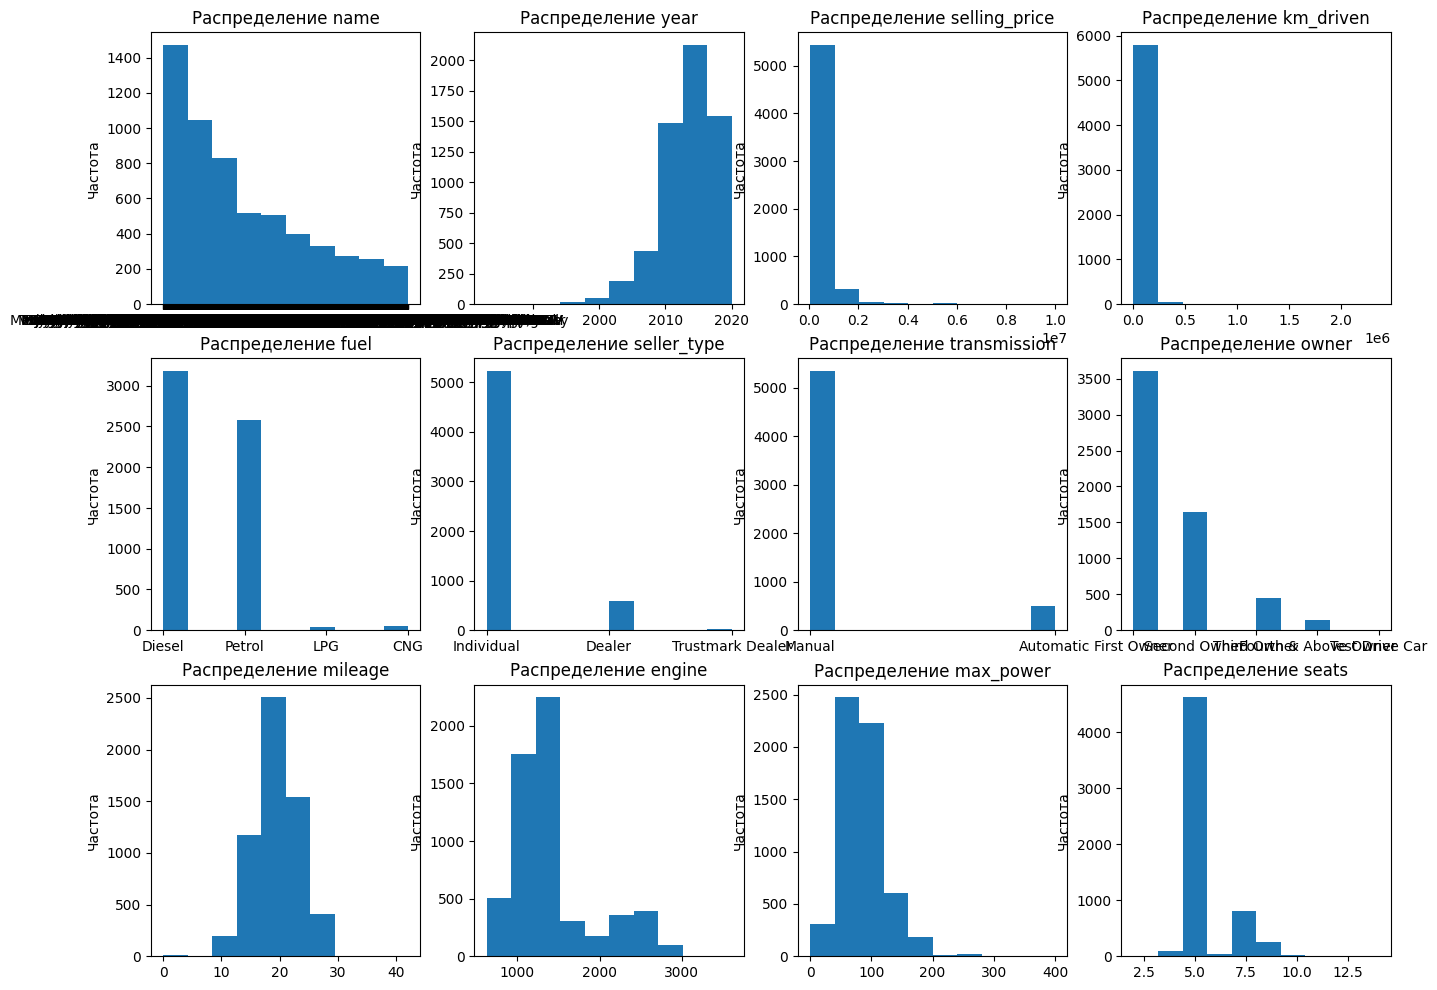

In [33]:
fig, axes = plt.subplots(nrows=int(len(df_train.columns.to_list())/4), ncols=4, figsize=(16, 12))

for ax, col in zip (axes.flatten(), df_train.columns.to_list()):
  ax.hist(df_train[col])
  ax.set_title(f'Распределение {col}')
  ax.set_ylabel('Частота')

plt.show()

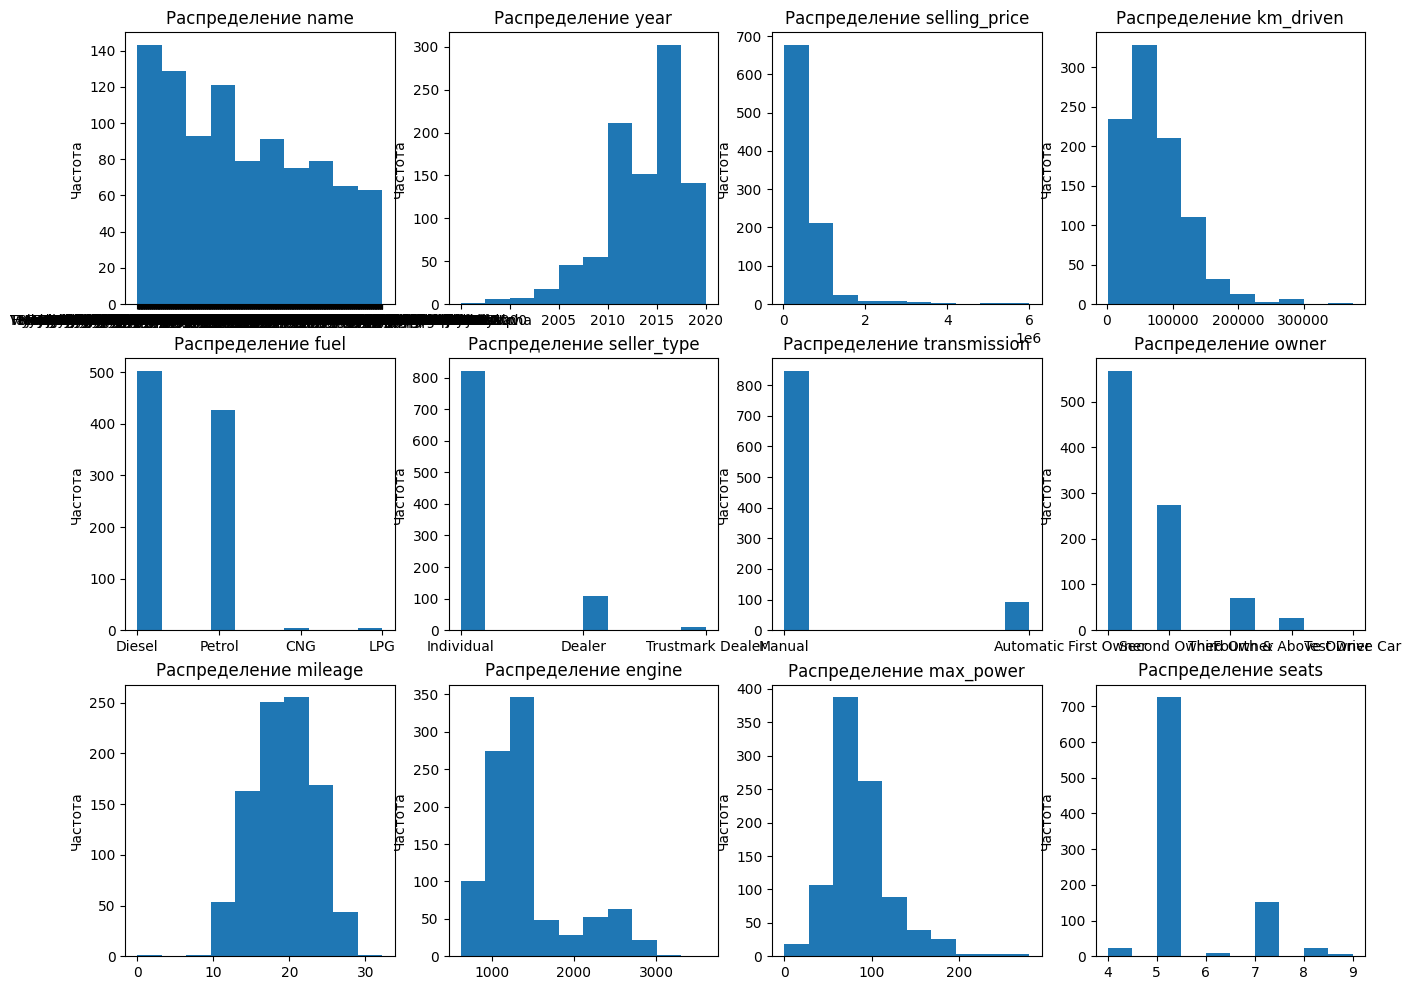

In [34]:
fig, axes = plt.subplots(nrows=int(len(df_test.columns.to_list())/4), ncols=4, figsize=(16, 12))

for ax, col in zip (axes.flatten(), df_test.columns.to_list()):
  ax.hist(df_test[col])
  ax.set_title(f'Распределение {col}')
  ax.set_ylabel('Частота')

plt.show()

***
**ВЫВОДЫ:**
***

1) Target в обоих случаях распределен логнормально с тяжелым правым хвостом, что говорит о наличии выбросов в стороне "больших" значений.

- 'fuel', 'seller_type', 'transmission', 'owner', 'engine', 'seats', 'torque_npm_min' в train и test распределены аналогично

- 'mileage' распределены похоже (в test ближе к нормальному и хвосты не такие тяжелые как в train)

- 'max_power'  в train имеет выбросы в стороне "больших" значений, поэтому распределение немного отличается от test, но без выбросов train и test были бы аналогичны

- 'torque_Nm' распределены аналогично и странно: почти все значения в диапазоне до 1000, в то время как хвост тянется до 10 000+
***

2) Распределения признаков в train и test отличаются:

- 'name' в test более равномерное, чем в train

- в train и test в основном авто с 2000г., но в train имеются более "старые" автомобили (минимальные значения 'year' меньше), которых в test нет

- у 'km_driven' в train очень тяжелый правй хвост (чего нет в тесте, не смотря на логнормальное распределение), что говорит о наличии выбросов в части "больших" значений
***

3) Возможно, есть связь между целевой переменной и 'km_driven', 'engine' и 'max_power', т.к. их распределения очень похожи.
***

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

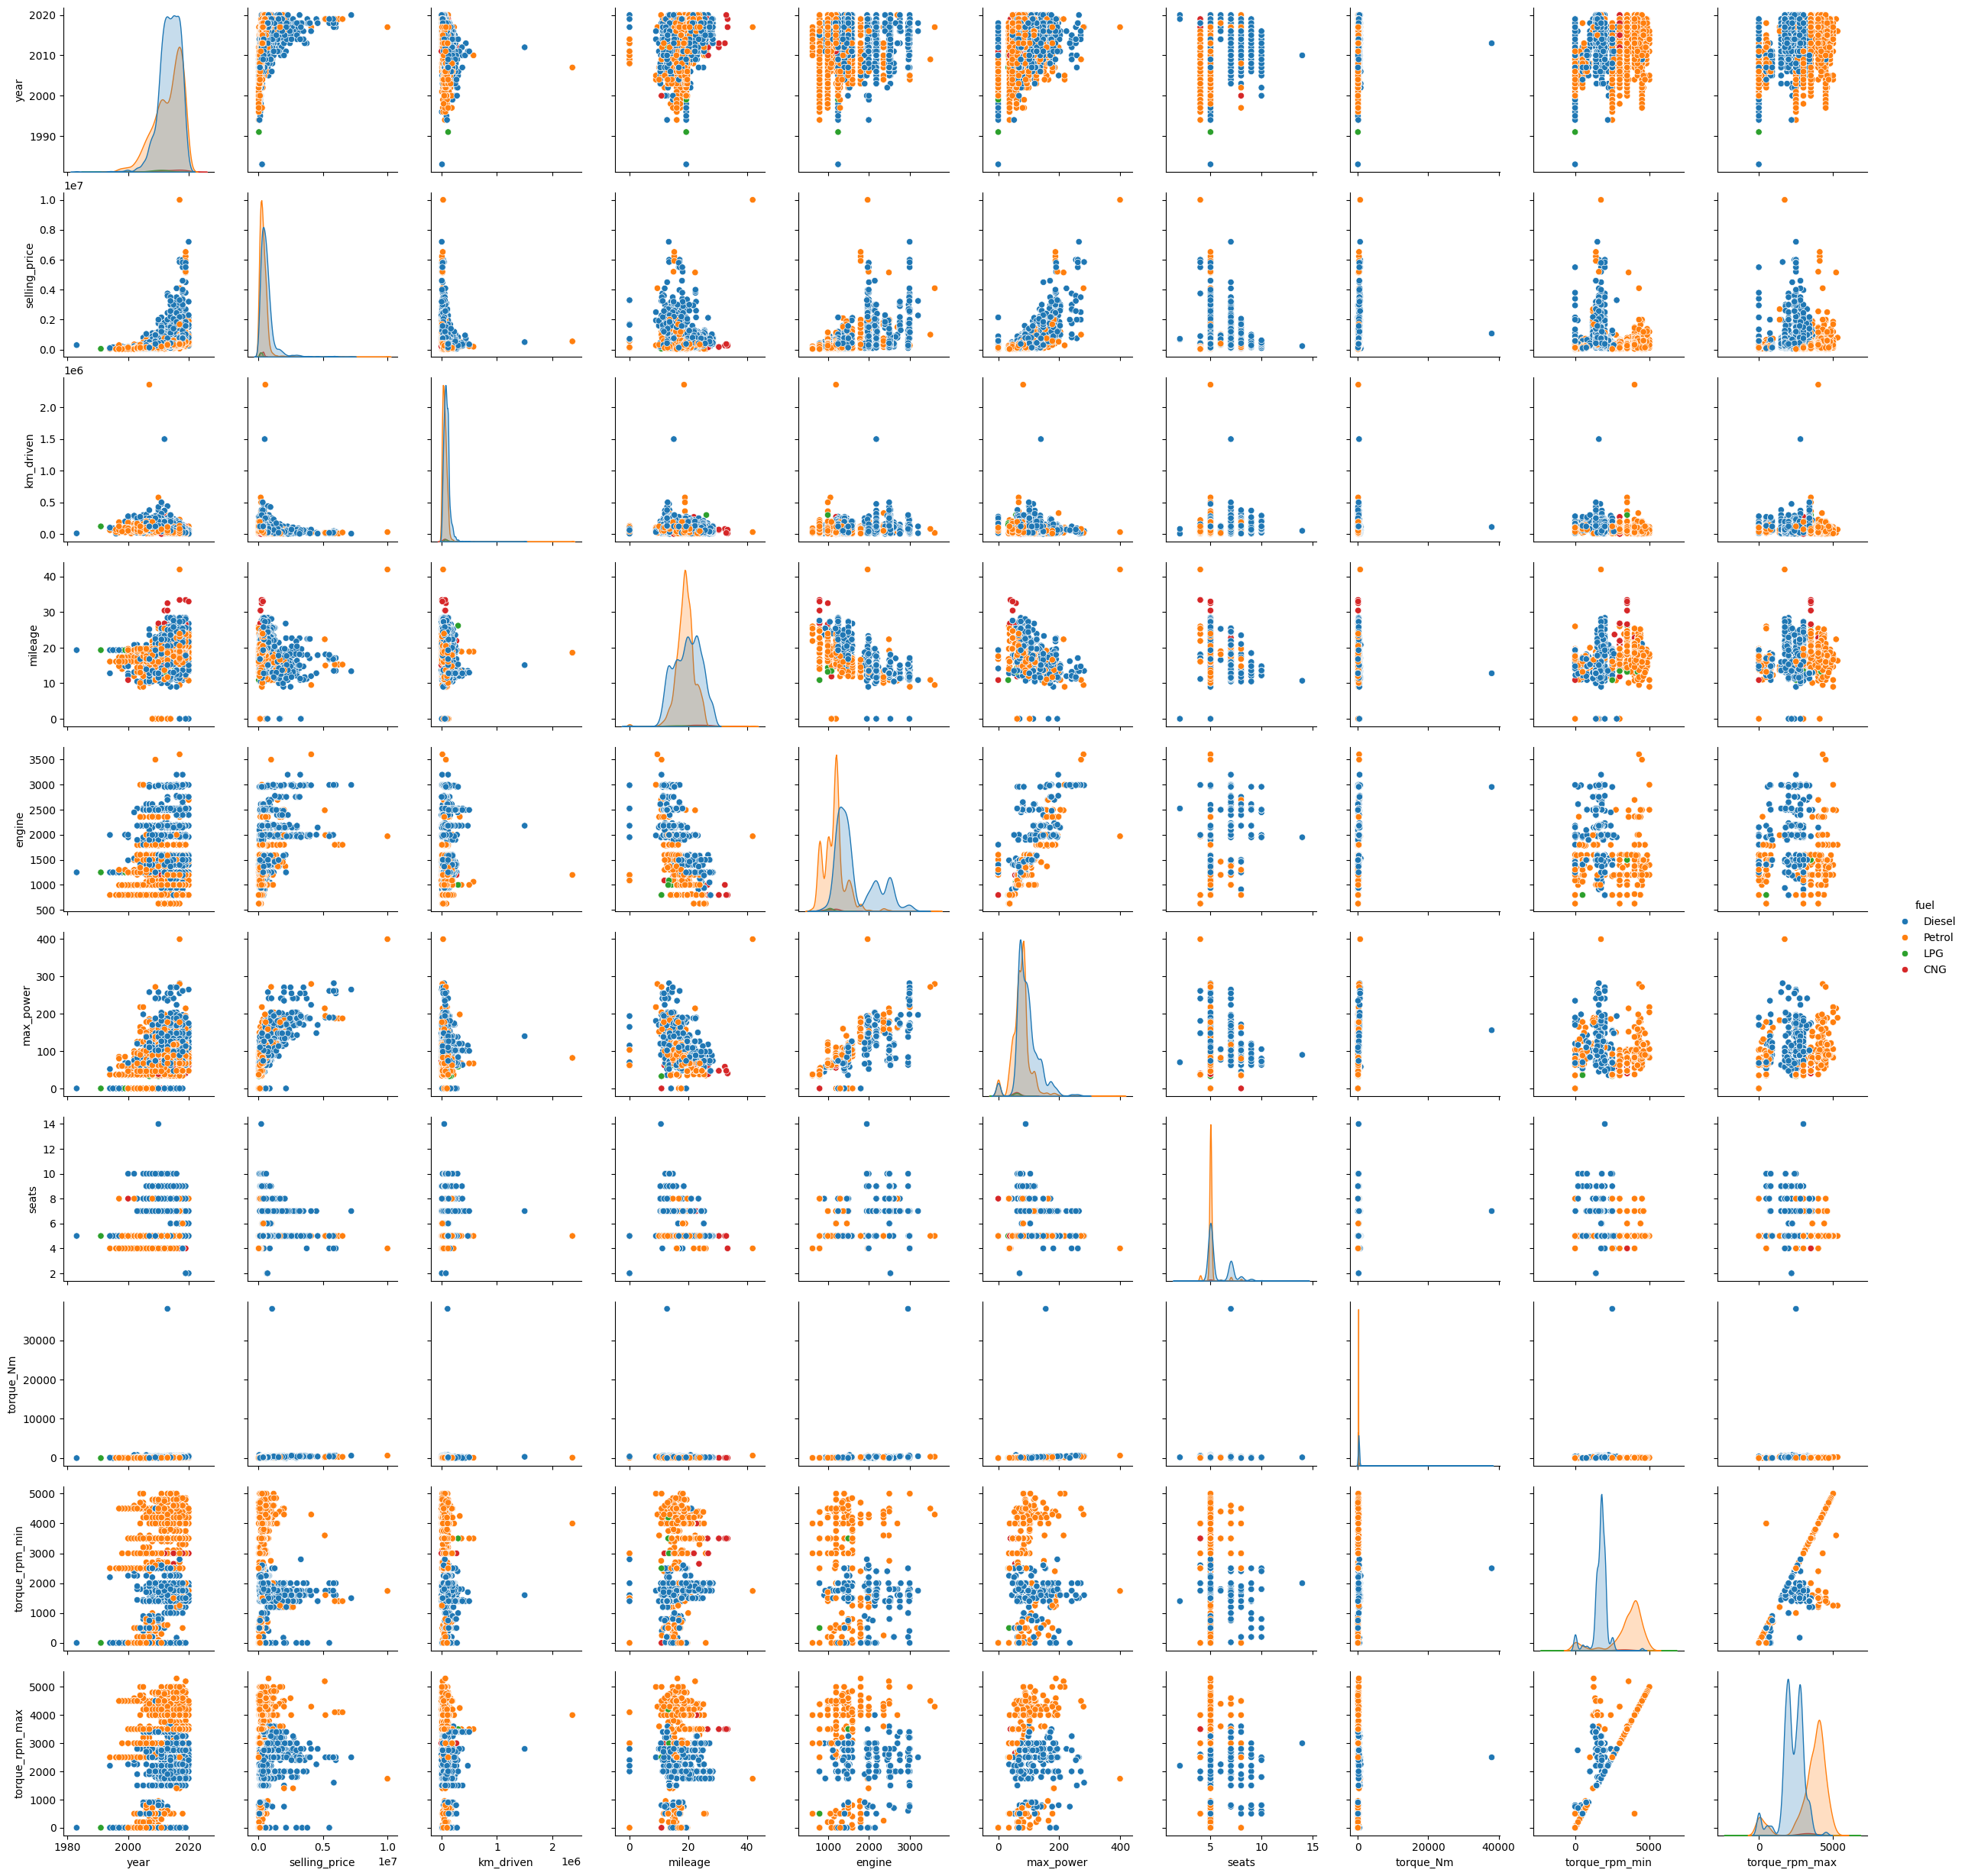

In [35]:
sns.pairplot(df_train, hue="fuel")

***
Связь признаков с целевой переменной прослеживается в столбцах 'year', 'km_driven', 'mileage', 'engine' и 'max_power'  

***
Можно предположить высокую корреляцию, если скатерплоты очень похожи, как например 'selling_price'-'torque_Nm' и 'km_driven'-'torque_Nm'
***

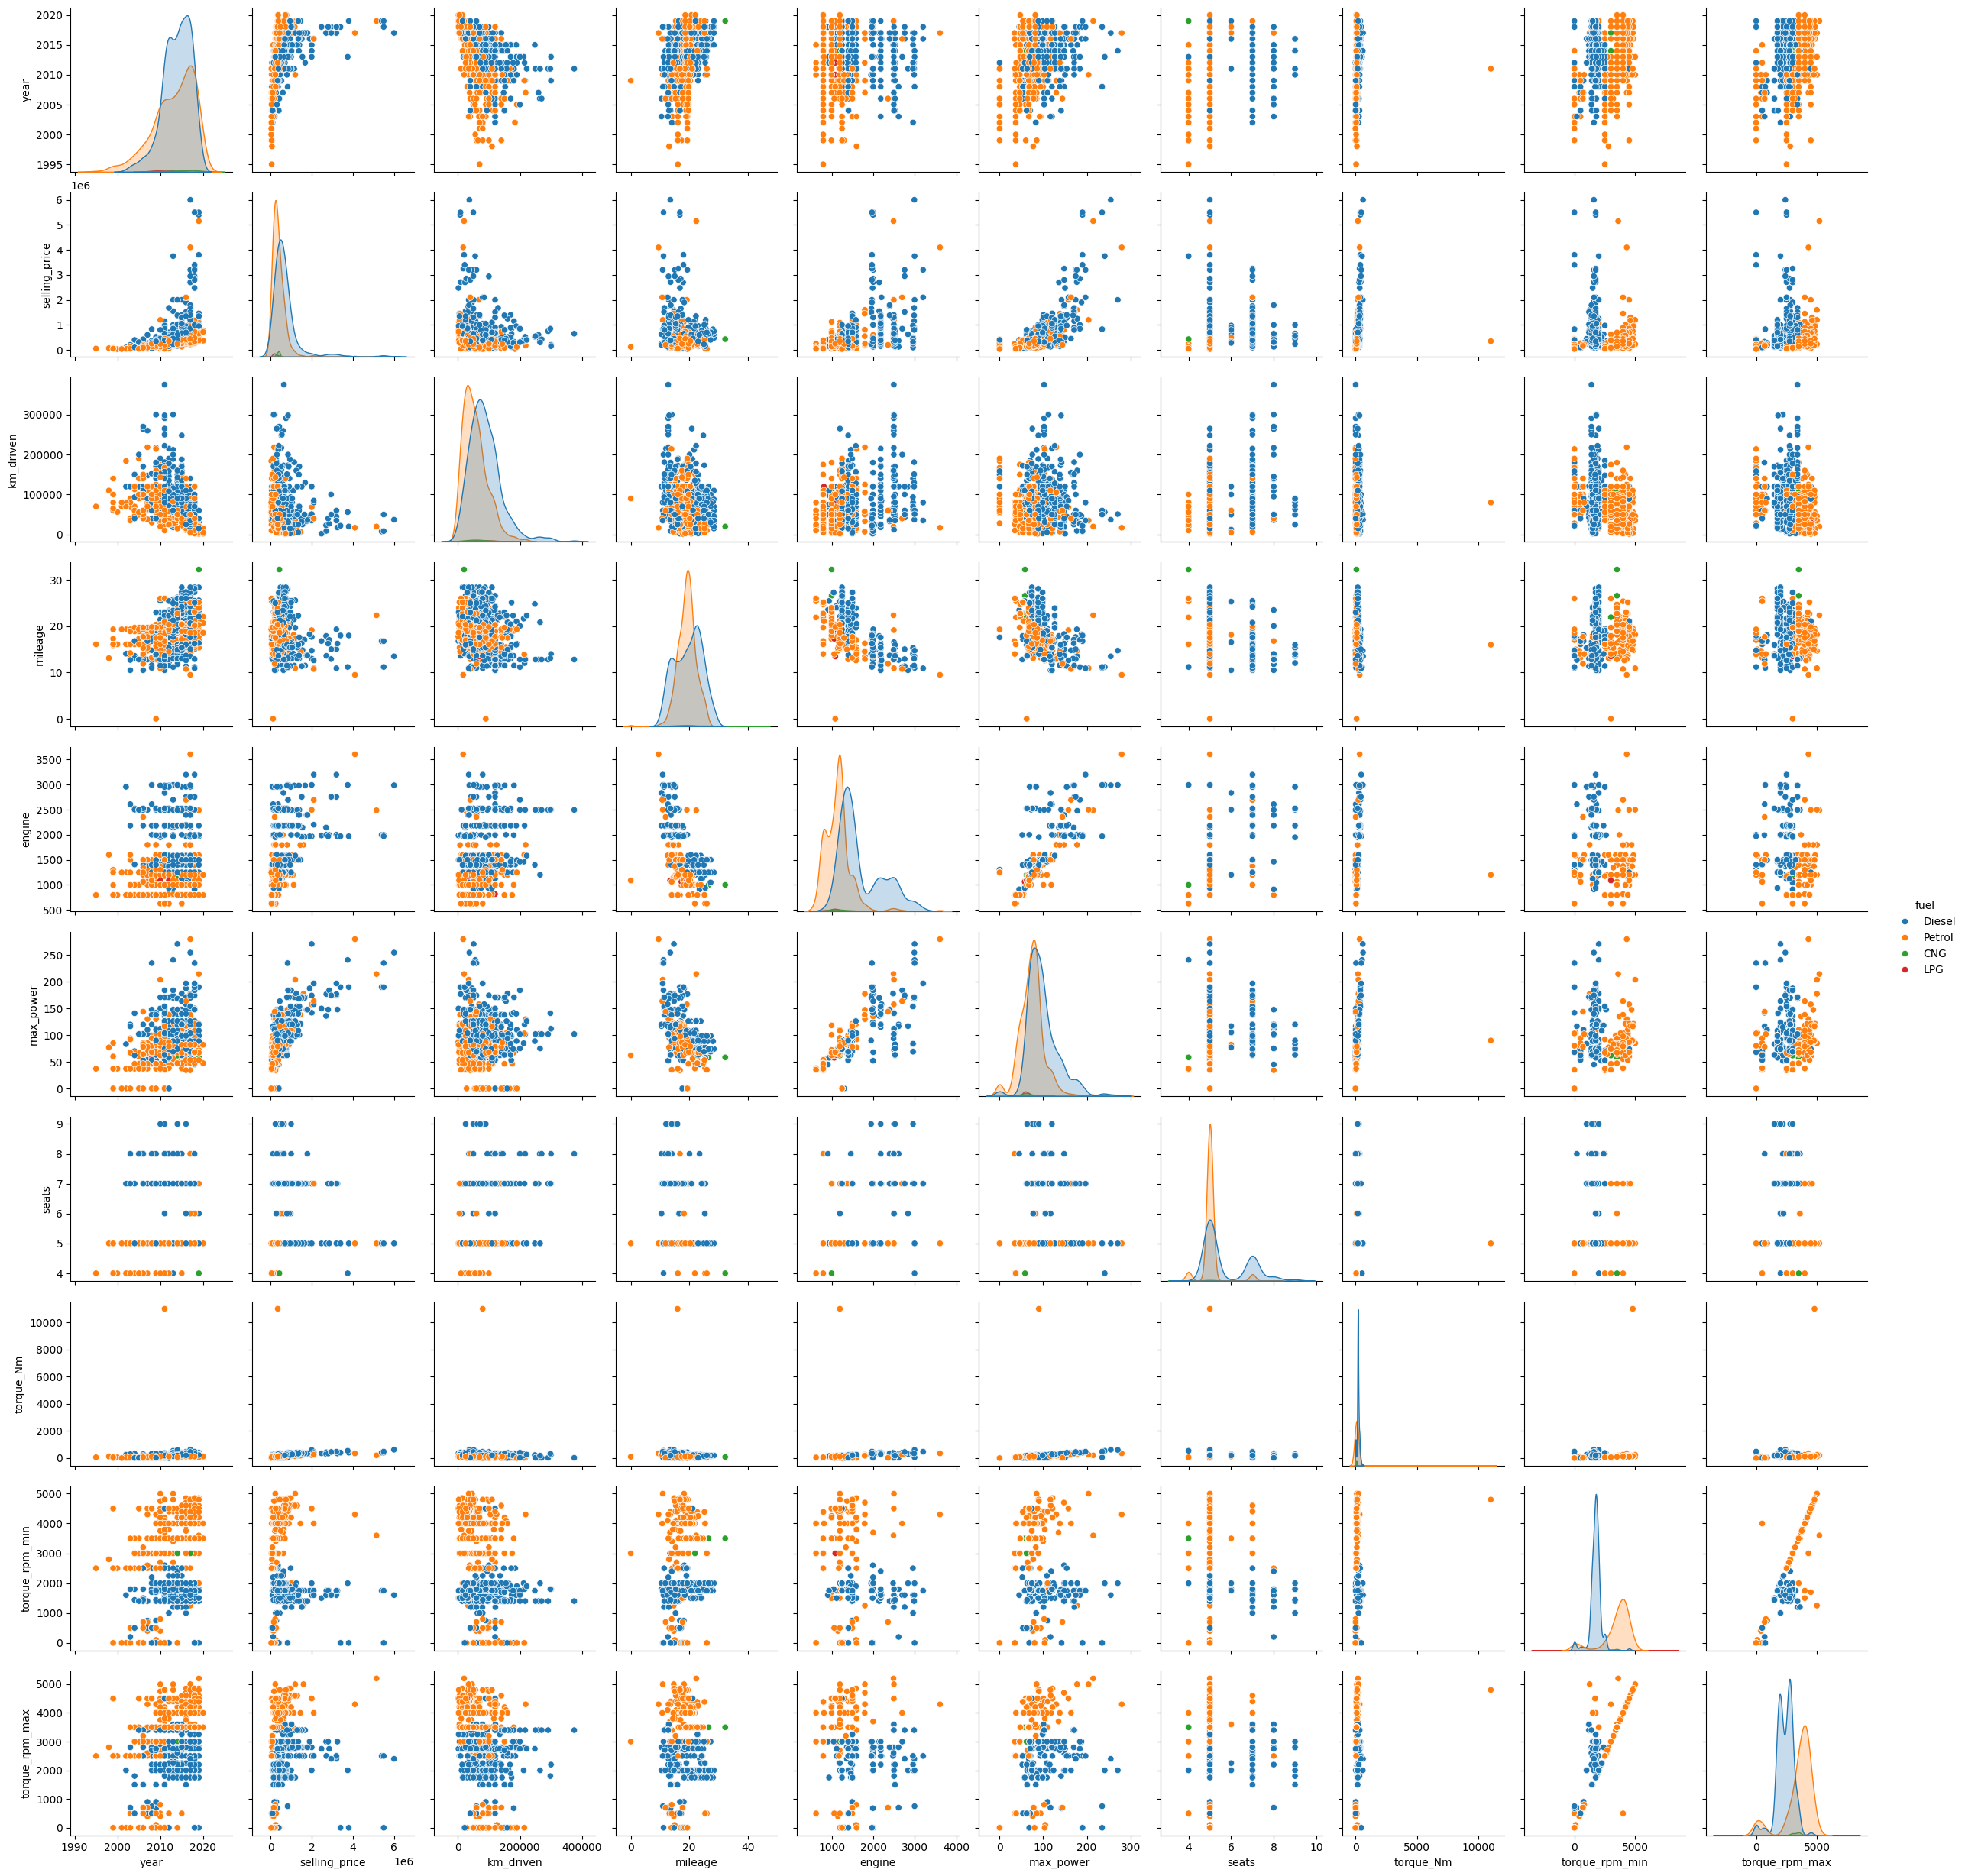

In [36]:
sns.pairplot(df_test, hue="fuel")

***
Большинство попарных связей похожи, но есть и сильная разница, например в 'selling_price'-'mileage' - в test взаимосвязь менее очевидна.
***
Так же по некоторым признакам есть четкое разделение по виду топлива

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

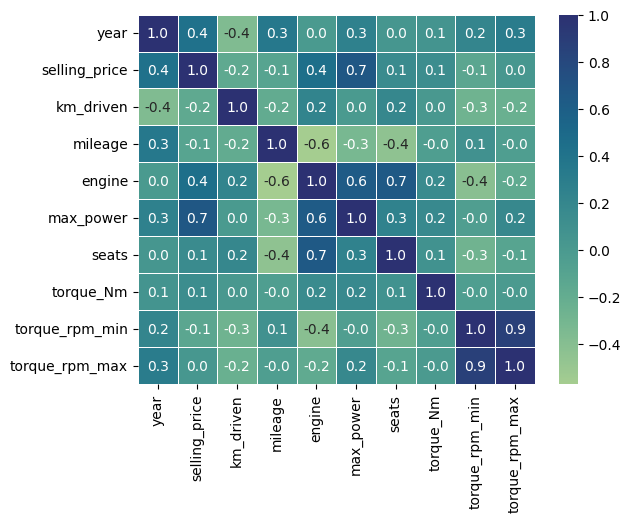

In [37]:
corr = df_train.select_dtypes(include=['int', 'float']).corr()

sns.heatmap(corr, annot=True, fmt=".1f", linewidth=.5, cmap="crest")

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

***
Наименее скоррелированы (коэффициент корреляции =0) признаки:
- 'year' - 'engine'
- 'year' - 'seats'
- 'selling_price' - 'torque_rpm_max'
- 'km_driven' - 'max_power'
- 'km_driven' - 'torque_Nm'
...
***
Cильная положительная линейная зависимость наблюдается между:
- 'selling_price' - 'max_power'
- 'engine' - 'seats'
***
Да, между 'year' и 'km_driven' обратная зависимость, коэффициент корреляции -0.4


### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [38]:
def rang_col (df, col):

  '''
  Функция возвращающая ранг значения столбца
  '''
  rangs = dict(zip(df[col].sort_values(), range(len(df[col]))))
  return df[col].apply(lambda x : rangs[x] if x in rangs.keys() else None)


numeric_columns = df_train.select_dtypes(include=[int, float]).columns.to_list()

for col_1 in numeric_columns[:round(len(numeric_columns)/2)]: #берем половину, т.к. (col_1, col_2) = (col_2, col_1)
  n = len(df_train[col_1])
  cols = numeric_columns.copy()
  cols.remove(col_1)
  for col_2 in cols:
    d = sum([(a-b)**2 for a,b in zip(rang_col (df_train, col_1), rang_col (df_train, col_2))])
    res = 1 - ( 6*d / (n*(n**2 - 1)) )
    print(f'Корреляция Пирсона между {col_1} и {col_2} равна {res}')
    print(f"Библиотечная реализация {df_train[[col_1, col_2]].corr(method='spearman').iloc[0][1]}")
    print()

Корреляция Пирсона между year и selling_price равна 0.6960558018118719
Библиотечная реализация 0.7071225678747137

Корреляция Пирсона между year и km_driven равна -0.6305867718979161
Библиотечная реализация -0.5696590682866405

Корреляция Пирсона между year и mileage равна 0.32786562461007107
Библиотечная реализация 0.35075547631570786

Корреляция Пирсона между year и engine равна -0.040906324862635124
Библиотечная реализация -0.040883341941111

Корреляция Пирсона между year и max_power равна 0.20669772893277083
Библиотечная реализация 0.22481095670477683

Корреляция Пирсона между year и seats равна -0.051133542206923455
Библиотечная реализация 0.04829056239496018

Корреляция Пирсона между year и torque_Nm равна 0.29211995601644525
Библиотечная реализация 0.3098636566469586

Корреляция Пирсона между year и torque_rpm_min равна 0.15770713679954096
Библиотечная реализация 0.16273465661551817

Корреляция Пирсона между year и torque_rpm_max равна 0.22534567016441198
Библиотечная реализация

In [39]:
!pip install phik -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.9 MB/s eta 0:00:00


interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_Nm', 'torque_rpm_min', 'torque_rpm_max']


<Axes: >

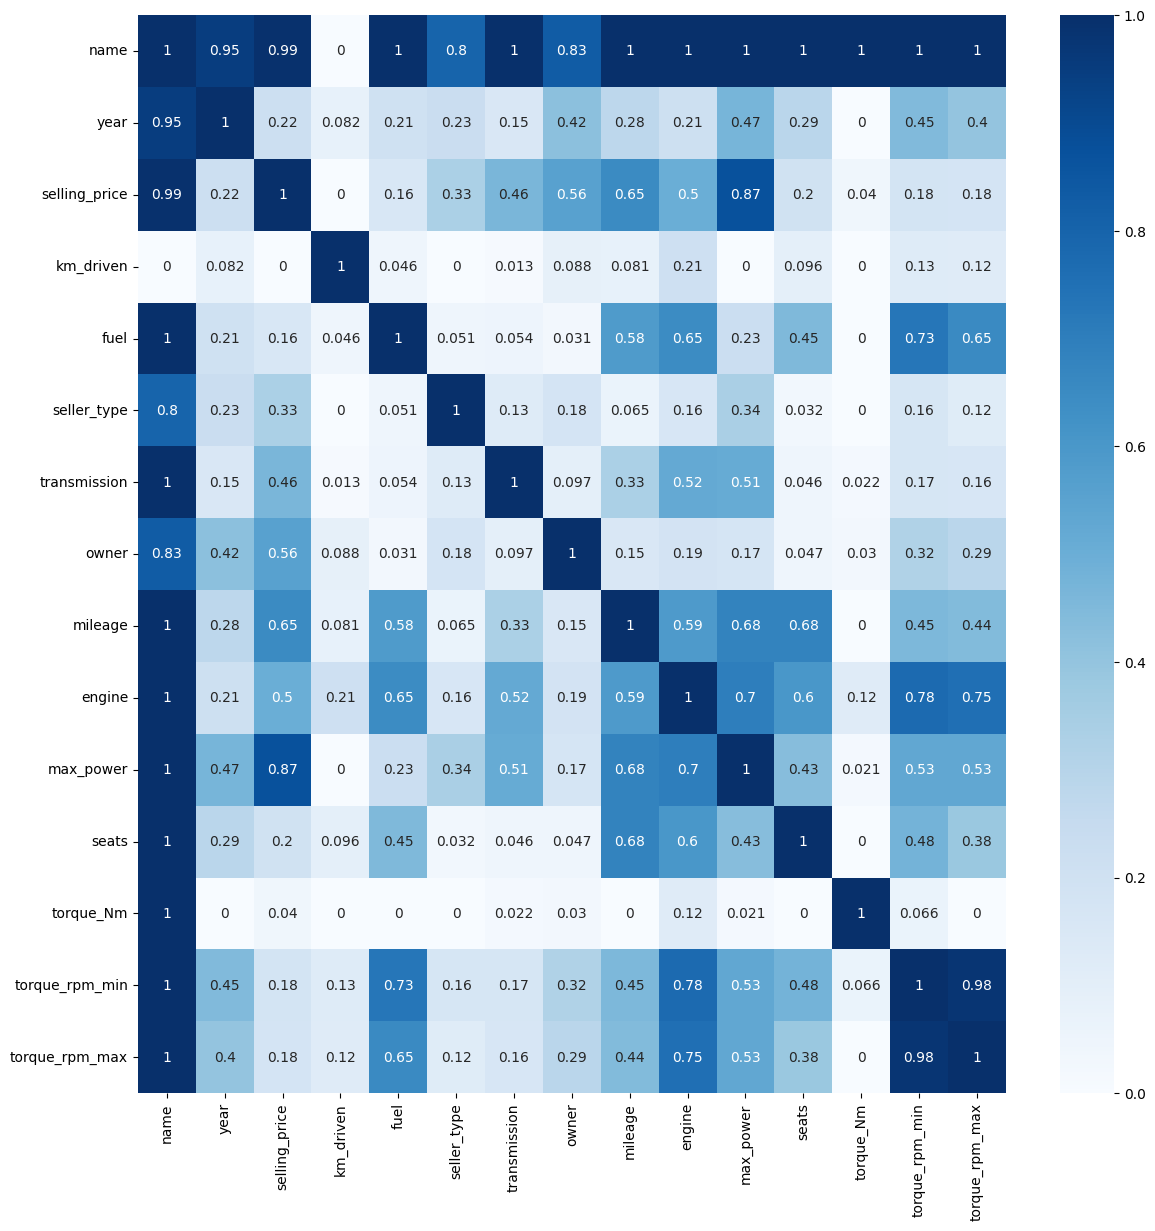

In [40]:
import phik

plt.figure(figsize=(14,14))

ph = df_train.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

**ВЫВОДЫ:**
***
- "ручная" реализация коэффициента корреляции Спирмена почти совпадает с библиотечной
***
- phi-корреляция показывает единичные значения столбца 'name' с остальными столбцами (т.к. технические характеристики автомобилей одной модели равны)
- target сильно коррелирует с 'name' и 'owner' - что было не очевидно в предыдущих подходах, а также 'max_power' и 'mileage' - что совпало с предыдущими наблюдениями
- также удивило, что пробег с ценой продажи не скоррелированы вообще никак (0)


### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<Axes: xlabel='km_driven', ylabel='selling_price'>

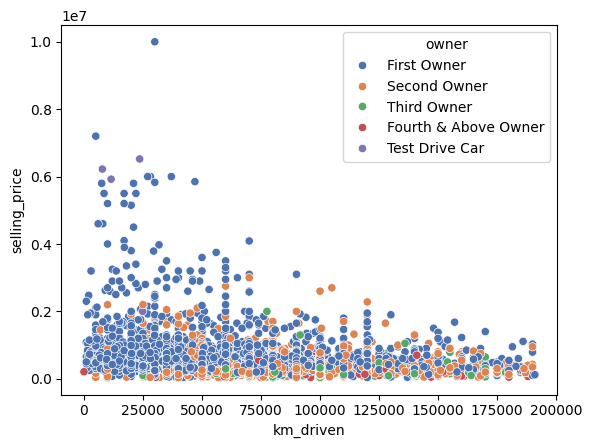

In [41]:
#почистим пробег от выбросов, чтобы была более читаемая визуализация "среднего по больнице"
iqr = df_train['km_driven'].quantile(.75) - df_train['km_driven'].quantile(.25)
low = df_train['km_driven'].quantile(.25) - 1.5 * iqr
high = df_train['km_driven'].quantile(.75) + 1.5 * iqr

km_driven_witout_outlaiers = df_train[['km_driven', 'selling_price', 'owner']][df_train['km_driven'] > low][df_train['km_driven'] < high]

sns.scatterplot(data=km_driven_witout_outlaiers, x="km_driven", y="selling_price", hue="owner", palette="deep")

**ВЫВОДЫ:**
***
очевидные: у машин с большим пробегом как правило 2 и > владелецев и стОят они дешевле.
неочевидные: одни из самых дорогих машин (3 фиолетовые точки) продаются после тест-драйва

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [42]:
numeric_columns = df_train.select_dtypes(include=[int, float]).columns.to_list()
df = df_train[numeric_columns]

from sklearn.model_selection import train_test_split

X = df.drop(columns=['selling_price'])
y = df['selling_price']

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print (f'Размер трейна {X_train.shape[0]}, размер теста {X_test.shape[0]}')

(5840, 9) (5840,)
Размер трейна 4380, размер теста 1460


In [43]:
#assert X_train.shape == (5840, 6)

In [44]:
#assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'MSE на тесте: {MSE(y_test, y_pred)}')
print(f'r2 на тесте: {r2_score(y_test, y_pred)}')

MSE на тесте: 664385990442.0876
r2 на тесте: -1.0170298946415186


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [46]:
def r2(y_true, y_pred):
    SSR = 0
    SST = 0
    y_mean = np.mean(y_true)
    for true_value, predicted_value in zip(y_true, y_pred):
      SSR +=(true_value - predicted_value)**2 #квадрат ошибки модели
      SST +=(true_value - y_mean)**2 #квадрат отклонения от среднего (дисперсия)

    r2 = 1 - (SSR/SST) #отношение SSR/SST показывает долю дисперсии, объясненную нашей моделью

    return r2

In [47]:
r2(y_test, y_pred)

-1.0170298946415182

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [48]:
def adjusted_r2(y_true, y_pred, X_test):

  '''
  Используется для сравнения моделей с разным количеством признаков.
  Т.к. R2 увеличивает свое значение при добавлении признаков, даже если они никакого отношения к объясняемой переменной не имеют
  Для того, чтобы была возможность сравнивать модели с разным числом факторов так,
  чтобы число регрессоров (факторов) не влияло на статистику R2 обычно используется
  скорректированный коэффициент детерминации, в котором используются несмещённые оценки дисперсий,
  который даёт штраф за дополнительно включённые факторы
  '''

  SSR = 0
  SST = 0
  y_mean = np.mean(y_true)
  for true_value, predicted_value in zip(y_true, y_pred):
    SSR +=(true_value - predicted_value)**2 #квадрат ошибки модели
    SST +=(true_value - y_mean)**2 #квадрат отклонения от среднего (дисперсия)

  n=len(y_true)
  p=len(X_test.columns.to_list())
  dfres = n - p - 1
  dftot = n - 1

  adj_r2 = 1 - ( (SSR/dfres) / (SST/dftot) ) #отношение SSR/SST показывает долю дисперсии, объясненную нашей моделью

  return adj_r2

In [49]:
adjusted_r2(y_test, y_pred, X_test)

-1.0295493905392932

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

print(f'MSE на тесте: {MSE(y_test, y_pred_scaled)}')
print(f'r2 на тесте: {r2_score(y_test, y_pred_scaled)}')

MSE на тесте: 664385990442.0642
r2 на тесте: -1.0170298946414476


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [51]:
feature_importance = dict(zip(np.abs(model_scaled.coef_), X_train.columns.to_list()))
sorted(feature_importance.items())

[(18241.563648908865, 'torque_rpm_max'),
 (39032.03906352164, 'mileage'),
 (67269.69677683167, 'seats'),
 (68649.78312201946, 'torque_rpm_min'),
 (68833.2510814676, 'torque_Nm'),
 (73870.9742556729, 'engine'),
 (82581.79103169897, 'km_driven'),
 (156823.53868451936, 'year'),
 (209610.62340683662, 'max_power')]

**ВЫВОДЫ:**
***
Наиболее значимыми оказались прижнаки:

- 'max_power'
- 'year'
- 'km_driven'
- 'engine'

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [52]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)

y_pred_lasso = model_lasso.predict(X_test_scaled)

print(f'MSE на тесте: {MSE(y_test, y_pred_lasso)}')
print(f'r2 на тесте: {r2_score(y_test, y_pred_lasso)}')

MSE на тесте: 664374141447.1975
r2 на тесте: -1.0169939219129263


In [53]:
#не занулила веса, видимо все признаки влияют
model_lasso.coef_

array([156821.19497142, -82580.90195989, -39029.05505158,  73869.30681551,
       209611.66496244, -67266.23863578,  68832.47247781, -68649.84445252,
       -18239.57278238])

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [54]:
from sklearn.model_selection import cross_val_score

model_lasso = Lasso()
cv_10 = cross_val_score(model_lasso,
                     X,
                     y,
                     scoring = 'r2',
                     cv=10)

print(cv_10)
print(cv_10.mean())
print(cv_10.std())

[ 0.51744837 -5.78113267  0.6379945   0.54319347  0.2800654   0.62880162
  0.43330762  0.59802413  0.52626016  0.55650819]
-0.10595292158078909
1.8943323698855814


In [55]:
from sklearn.model_selection import cross_validate

model_lasso = Lasso()
cv_10 = cross_validate(model_lasso,
                     X,
                     y,
                     scoring = ('r2', 'neg_mean_squared_error'),
                     cv=10)

print(cv_10)
print(cv_10['test_r2'].mean())
print(cv_10['test_neg_mean_squared_error'].mean())

{'fit_time': array([0.04322553, 0.01925755, 0.01124239, 0.02931714, 0.03232169,
       0.03548861, 0.03785133, 0.02796006, 0.02699018, 0.03298783]), 'score_time': array([0.01154685, 0.00477767, 0.00485325, 0.00585246, 0.01506853,
       0.01162195, 0.01156235, 0.01330853, 0.01205516, 0.01295924]), 'test_r2': array([ 0.51744837, -5.78113267,  0.6379945 ,  0.54319347,  0.2800654 ,
        0.62880162,  0.43330762,  0.59802413,  0.52626016,  0.55650819]), 'test_neg_mean_squared_error': array([-3.45122494e+11, -1.25271583e+12, -9.48598873e+10, -1.07753776e+11,
       -9.18911282e+10, -1.23135136e+11, -2.02853449e+11, -8.46216528e+10,
       -6.02510229e+10, -1.26459993e+11])}
-0.10595292158078909
-248966436673.63876


In [56]:
from sklearn.model_selection import GridSearchCV

model_lasso = Lasso()
params_for_search = {"alpha": [0.1, 1.0, 5, 20, 100], 'fit_intercept' : [True, False]}

grid_search = GridSearchCV(estimator=model_lasso,
                           param_grid=params_for_search,
                           cv=10,
                           scoring='r2'
                           )

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 100, 'fit_intercept': True}
Best Cross-Validation Score: 0.575411496978927


In [57]:
grid_search.best_estimator_.coef_

array([156589.39284989, -82493.31931952, -38733.06899755,  73707.02866791,
       209713.90833443, -66925.10272378,  68754.39550781, -68657.25997305,
       -18040.97281007])

***
GridSearchCV пришлось обучать 10 (кол-во фолдов) * 5 * 2 (кол-во возможных параметров) моделей
***
alpha определяет силу регуляризации L1
***
Лучший коэффициент для L1 = 2.0. Никакие коэффициенты не занулились
***

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [58]:
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet()
params_for_search = {"alpha": [0.1, 0.5, 1.0, 2.0], 'l1_ratio' : [0.1, 0.3, 0.5, 0.7, 1], 'fit_intercept' : [True, False]}

grid_search = GridSearchCV(estimator=model_elastic,
                           param_grid=params_for_search,
                           cv=10,
                           scoring='r2',
                           )

grid_search.fit(X_train_scaled, y_train)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.5}
Best Cross-Validation Score: 0.5761988075038746


***
GridSearchCV обучил 10 * 4 *5 * 2 моделей.
***
Дучшие параметры: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.5}

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [ ]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [59]:
df_train['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Hyundai i20 Sportz Diesel', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [60]:
df_train['name'].nunique()

1924

In [61]:
df_train['name'].transform(lambda x: x.strip().split()[0]).unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot'], dtype=object)

In [62]:
df_train['name'].transform(lambda x: x.strip().split()[0]).nunique()

30

In [63]:
df = df_train.copy()
df['name'] = df_train['name'].transform(lambda x: x.strip().split()[0])
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
3   Maruti  2007         130000     120000  Petrol  Individual       Manual   
4  Hyundai  2017         440000      45000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  torque_Nm  torque_rpm_min  \
0   First Owner    23.40    1248      74.00      5     190.00        2,000.00   
1  Second Owner    21.14    1498     103.52      5     250.00        1,500.00   
2   First Owner    23.00    1396      90.00      5      22.40        1,750.00   
3   First Owner    16.10    1298      88.20      5      11.50          500.00   
4   First Owner    20.14    1197      81.86      5     113.70        4,000.00   

   torque_rpm_max  
0        2,000.00  
1        2,500.00  
2        2,750.00  
3          500.00  
4        4,000.00

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [64]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X = df.drop(columns=['selling_price'])
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)
X_train_ohe = enc.transform(X_train)
X_test_ohe = enc.transform(X_test)

In [65]:
#assert X_train_cat.shape == (5840, 11)

In [66]:
#X_train_cat.describe(include='object')

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

OHE применяется, когда нужно закодировать не очень много категорий, т.к. алгоритм создает на каждую категорию свой столбец с очень разреженными значениями. Поэтому если категорий много, то признаковое пространство очень сильно раздувается почти пустыми столбцами, что не очень хорошо.

***

Один столбец удатяется, т.к. к одна из категорий может быть закодирована вектором из 0, что будет означать, что признак объекта не принадлежит ни одной из имеющихся n-1 категорий.

***

столбцы OHE с низкой важностью удалять не корректно, т.к. это зависимые столбцы, т.е. они порождаются одной природой. И если мы их удалим, то нарушится логика этой природы, и тот столбец, который был "важным" окажется безсполезным.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_ohe)
X_train_scaled=scaler.transform(X_train_ohe)
X_test_scaled=scaler.transform(X_test_ohe)


model_lasso = Ridge()
params_for_search = {"alpha": [0.1, 1.0, 5, 20, 100], 'fit_intercept' : [True, False]}

grid_search = GridSearchCV(estimator=model_lasso,
                           param_grid=params_for_search,
                           cv=10,
                           scoring='r2'
                           )

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Hyperparameters: {'alpha': 100, 'fit_intercept': True}
Best Cross-Validation Score: 0.7962076767319969


# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [100]:
#добавим полиномиальные фичи
#pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'torque_Nm', 'torque_rpm_min', 'torque_rpm_max'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object'))])),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('regressor', Ridge(alpha=100))])

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures


cat_features_mask = (X.dtypes == "object").values

# Преобразование числовых столбцов
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Замена пропусков на среднее
    ('scaler', StandardScaler())  # Масштабирование признаков
])

# Преобразование категориальных столбцов
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),  # Замена пропусков на 'NA'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OHE-кодирование
])

# Объединяем преобразования с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.columns[~cat_features_mask]),
        ('cat', categorical_transformer, X.columns[cat_features_mask])
    ]
)

# Полный пайплайн с линейной регрессией
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', Ridge(alpha=100, fit_intercept=True))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(f'MSE на тесте: {MSE(y_test, y_pred)}')
print(f'r2 на тесте: {r2_score(y_test, y_pred)}')

MSE на тесте: 6968910149729336.0
r2 на тесте: -21156.128999245557


**ВЫВОД:**

автоматическое добавление полиномиальных признаков сильно снизило качество

***

Попробуем вручную придумать признаки, основываясь на pairplots, построенных выше:
- 'year' и 'mileage' возведем в квадрат

- 'km_driven' возведем в -1 степень

- бинаризуем 'engine', 'max_power', 'torque_Nm'

In [252]:
def castom_transform(df):

  df['year**2'] = df['year'].transform(lambda x : x**2)
  df['mileage**2'] = df['mileage'].transform(lambda x : x**2)
  df['1_div_km_driven'] = df['km_driven'].transform(lambda x : 1/x)
  df['engine_bins'] = pd.cut(df['engine'], bins=14, labels=list(range(14)))
  df['max_power_bins'] = pd.cut(df['max_power'], bins=14, labels=list(range(14)))
  df['torque_Nm_bins'] = pd.cut(df['torque_Nm'], bins=14, labels=list(range(14)))

  return df

In [253]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(castom_transform)

# Полный пайплайн с линейной регрессией
pipeline = Pipeline(steps=[
    ('castom_transformer', transformer),
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=100, fit_intercept=True))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(f'MSE на тесте: {MSE(y_test, y_pred)}')
print(f'r2 на тесте: {r2_score(y_test, y_pred)}')

MSE на тесте: 1274628061346.059
r2 на тесте: -2.8696825960662204


In [200]:
#В начале была очень замороченная обработка пропусков. Попробуем заменить на коробочное решение

df_train_raw = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_train_raw = df_train_raw.loc[df_train_raw.drop(columns=['selling_price']).drop_duplicates().index.to_list()]
df_train_raw = data_preproc(df_train_raw)

X_raw = df_train_raw.drop(columns=['selling_price'])
y_raw = df_train_raw['selling_price']


X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.25, random_state=42)

cat_features_mask_raw = (X_raw.dtypes == "object").values

#Пайплайн с кастомной генерацие признаков и Лассо
pipeline = Pipeline(steps=[
    ('castom_transformer', transformer),
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.3, fit_intercept=True))
])

pipeline.fit(X_train_raw, y_train_raw)

y_pred = pipeline.predict(X_test_raw)
print(f'MSE на тесте: {MSE(y_test, y_pred)}')
print(f'r2 на тесте: {r2_score(y_test, y_pred)}')

MSE на тесте: 148414559346.68176
r2 на тесте: 0.5494236674028742


In [207]:
import pickle

with open('Lasso.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [208]:
with open('Lasso.pkl', 'rb') as f:
    pipe = pickle.load(f)

In [209]:
pipe.predict(X_test_raw)

array([267550.05085805, 360345.06678149, 447971.98152894, ...,
       743930.20120768, 872709.38223334, 297297.998948  ])

In [262]:
df_test_raw = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
df_test_raw = data_preproc(df_test_raw)

pipe.predict(df_test_raw)

array([ 2.66961257e+05,  6.69080645e+05,  4.92613502e+05,  7.16175537e+05,
        2.46892146e+05,  8.96380493e+05,  1.96967284e+05,  3.75535713e+05,
        2.49467988e+05,  9.95574928e+05,  9.32506464e+05,  5.14872689e+06,
        6.20828224e+05,  1.46794078e+05,  5.79471143e+05,  4.09872649e+06,
        5.54141629e+05,  1.72345792e+05,  4.17173214e+05,  2.31129089e+05,
        3.40573520e+05,  8.54270364e+04,  1.03566271e+06,  1.89898735e+05,
        6.59147985e+05,  5.39270915e+05,  6.77567979e+05,  1.17015811e+06,
        3.68304153e+05,  6.36739494e+05,  1.45869383e+06,  8.26672078e+05,
        6.46956471e+05,  4.62305660e+05,  2.88939258e+05,  3.06949344e+05,
        4.79937020e+05,  1.68131037e+05,  3.68315532e+05,  5.92289287e+05,
        3.56565277e+05,  3.10692596e+05,  2.12737511e+05,  3.86189709e+05,
        3.63086552e+05,  4.55068923e+05,  2.51203376e+05,  1.63907244e+05,
        4.54036560e+05,  5.84823254e+05,  2.08220742e+05,  3.29865329e+05,
        7.32315164e+05,  

In [278]:
pd.DataFrame(df_test_raw.loc[0]).T

name  year selling_price km_driven    fuel seller_type  \
0  Mahindra Xylo E4 BS IV  2010        229999    168000  Diesel  Individual   

  transmission        owner mileage   engine  ... seats torque_Nm  \
0       Manual  First Owner   14.00 2,498.00  ...  7.00    260.00   

  torque_rpm_min torque_rpm_max  year**2 mileage**2 1_div_km_driven  \
0       1,800.00       2,200.00  4040100     196.00            0.00   

  engine_bins max_power_bins torque_Nm_bins  
0           8              5              0  

[1 rows x 21 columns]

In [279]:
pipe.predict(pd.DataFrame(df_test_raw.loc[0]).T)

array([266961.25740385])

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [174]:
def business_metrics(y_true, y_pred):
    counter = 0
    n=len(y_true)
    counter = sum([1 if np.abs((y_pred[i]*100 / y_true.values[i]) - 100) > 10 else 0 for i in range(len(y_true))])

    return counter*100/n

business_metrics(y_test, y_pred)

75.20547945205479

In [188]:
#проверим на наших данных

y_test_copy = y_test.copy()
y_test_copy = pd.DataFrame(y_test_copy)
y_test_copy['pred'] = y_pred
y_test_copy['diff'] = (y_test_copy['pred'] *100 / y_test_copy['selling_price']) - 100
y_test_copy['more_10'] = [np.abs(y_test_copy['diff']) > 10][0]
y_test_copy['more_10'].astype('int').sum()

1098

In [189]:
len(y_test_copy)

1460

In [190]:
y_test_copy['more_10'].astype('int').sum()*100/len(y_test_copy)

75.20547945205479

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [281]:
!pip install 'fastapi[all]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.6/442.6 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 11.4 MB/s eta 0:00:00


In [289]:
%%writefile main.py

from fastapi import FastAPI
import pickle
from pydantic import BaseModel
from typing import List

app = FastAPI()

with open('/content/Lasso.pkl', 'rb') as f:
    pipe = pickle.load(f)

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:

    return pipe.predict(pd.DataFrame(df_test_raw.loc[0]).T)


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return pipe.predict(items)

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

34.134.45.181your url is: https://cold-crab-50.loca.lt
Traceback (most recent call last):
  File "/usr/local/bin/uvicorn", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/main.py", line 412, in main
    run(
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 65, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/l

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>